> ### EEE3314: Introduction to Artificial Intelligence

# Assignment VII: Principal Components Analysis

### *Assignement Instructions:*
- **Due date**: 11 PM, Dec. 3 (Fri), 2021
- **File name**: [ID_Name_HW7.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.** We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[2017142047] [한민규]</span>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-12-02 07:46:03.936311


In [2]:
%load_ext autoreload
%autoreload 2

## Problem statement

In this project, we will use the $\texttt{Labeled Faces in the Wild (LFW)}$ dataset. For more details about the dataset, please refer to the descriptions in the assignment VI.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd '/content/drive/MyDrive/3_2_연대수업/기인지프로젝트/project7'

/content/drive/MyDrive/3_2_연대수업/기인지프로젝트/project7


In [4]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [5]:
def plot_faces(images, tile, fig_size=(8, 5), disp_name=True):
    fig = plt.figure(figsize=fig_size)
    for i in range(tile[0] * tile[1]):
        ax = fig.add_subplot(tile[0], tile[1], i+1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap='gray')
        if disp_name:
            ax.set_title(faces.target_names[faces.target[i]])
    plt.show()

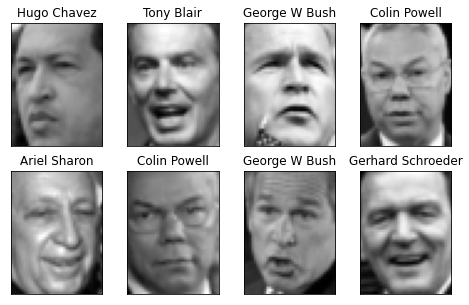

In [7]:
plot_faces(faces.images, tile=(2, 4))

In the assignemnt VI, we used the **eigenface** to extract the features for the face image. The eigenface representation provides a set of eigenvectors (i.e., orthonormal basis) for face images. This suggests that we can represent an arbitrary face image as a linear combination of the eigenvectors and corresponding coefficients. The eigenface representations could also be used to compress face images by projecting them onto the eigenface, discarding eigenvectors with small coefficients, and reconstructing the face images with limited eigenvectors. 

Let's apply a $\texttt{PCA}$ to decompose the face images in the $\texttt{LFW}$ dataset.

**NOTE**: To implement the $\texttt{PCA}$, exploiting ```sklearn.decompose``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. Principal Component Analysis

P1.1 Implement the PCA (the ```PCA``` class). To compute the covariance matrix, and its corresponding eigenvalues and eigenvectors, you can use a ```numpy``` built-in function. Note that normally face images are standardized before applying a dimension reduction technique, and you should undo the standardization when reconstructing the original face images. *(40 points)*

P1.2 Run the code provided to plot the eigenfaces. Analyze the meaning of eigenfaces and corresponding eigenvalues. *(5 points)*

P1.3 Run the code provided to plot original face images, face images projected onto each component of eigenfaces, and reconstructed face images with eigenfaces. Analyze and contrast the differences between the original and reconstructed face images. Also describe the differences between results for the two examples. *(10 points)*

### P2. Face Recognition System

P2.1 Implement a face recognition system (the ```FaceRecognizer``` class). The face recognition system projects face images (i.e., training samples) onto eigenspace spanned by eigenfaces. It then saves the coefficients corresponding each eigenvector as a feature to represent the identity of a face image in the database. 

When we query a novel face image (i.e., test samples), the system projects the face images again onto the eigenspace, followed by extracting coefficients. We can identify the identity of the query face image, by retrieving the nearest neighbor (in terms of L2 norm) for the extracted coefficient in the database. *(20 points)*

P2.2 Run the code provided to plot the query faces and corresponding nearest faces in the database. *(5 points)*

---

## Results

In [8]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from project7 import *


faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Prepare Dataset

In [9]:
image_shape = faces.images[0].shape
X = faces.data
y = faces.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [11]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (862, 1850)
y_train.shape:  (862,)


### P1.1

In [12]:
num_components = 150
pca = PCA(num_components=num_components)

In [13]:
pca.find_principal_components(X_train)

In [14]:
pca.eigenbasis[0].dot(pca.eigenbasis[5])
print("% 10f"% (pca.eigenbasis[0].dot(pca.eigenbasis[5])))

 -0.000000


In [15]:
print("% 10f"% pca.eigenbasis[5].dot(pca.eigenbasis[5]))

  1.000000


### Mean face image for training samples

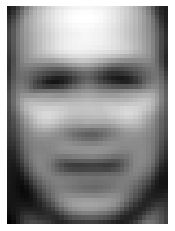

In [16]:
plt.imshow(pca.X_mean.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.show()

### Standardized training samples

In [17]:
print(pca.X_mean.shape)

(1850,)


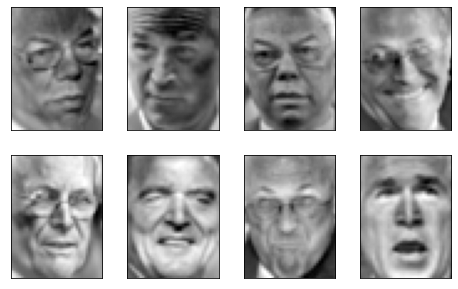

In [18]:
plot_faces(((X_train - pca.X_mean) / pca.X_std).reshape(X_train.shape[0], image_shape[0], image_shape[1]), tile=(2, 4), disp_name=False)

In [19]:
data_reduced = pca.reduce_dimensionality(X_train)
data_reduced.shape

(862, 150)

In [20]:
eigenbasis = pca.eigenbasis
eigenbasis.shape

(150, 1850)

---

### P1.2

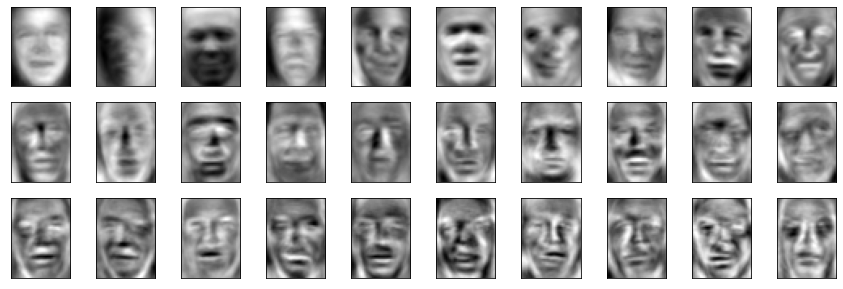

In [21]:
plot_faces(eigenbasis.reshape(num_components, image_shape[0], image_shape[1]), fig_size=(15, 5), tile=(3, 10), disp_name=False)

In [22]:
np.diag(eigenbasis.dot(eigenbasis.T))

array([1.        , 0.99999994, 1.        , 0.9999998 , 1.        ,
       1.        , 1.        , 1.        , 1.0000001 , 1.        ,
       1.0000001 , 1.0000002 , 1.0000002 , 1.        , 0.9999998 ,
       1.0000001 , 0.99999976, 1.        , 0.9999998 , 0.9999999 ,
       0.9999998 , 0.9999999 , 0.9999999 , 1.        , 1.        ,
       1.0000001 , 0.99999994, 1.        , 0.9999999 , 1.        ,
       0.99999994, 0.9999999 , 1.0000001 , 1.0000001 , 0.9999998 ,
       0.9999999 , 1.0000002 , 0.99999994, 1.        , 1.0000001 ,
       1.        , 1.        , 1.0000001 , 1.0000001 , 1.0000001 ,
       0.9999999 , 0.9999999 , 1.0000001 , 1.        , 1.0000002 ,
       1.0000001 , 0.9999998 , 0.99999994, 0.9999999 , 0.99999994,
       0.99999994, 0.99999994, 1.0000001 , 0.99999994, 1.        ,
       1.        , 1.        , 0.9999999 , 0.9999999 , 0.9999999 ,
       1.0000001 , 1.0000001 , 1.0000001 , 1.        , 1.0000001 ,
       1.        , 1.0000002 , 0.99999994, 0.9999999 , 0.99999

In [23]:
diag = np.zeros((num_components, num_components))
np.fill_diagonal(diag, 1)
print("% 10f"% np.max(eigenbasis.dot(eigenbasis.T) - diag))

  0.000000


Describe your analysis here</br>

Analyze the meaning of eigenfaces and corresponding eigenvalues</br>

- 이미지(50*37)에서 픽셀의 intensity를 flat하게 하여 벡터로 만들고, 주어진 이미지의 개수(862)와, flat된 벡터의 차원(1850)으로 구성된 데이터를 가지고 PCA를 수행하면 차원 수와 동일한 개수의 eigencvector를 얻을 수 있다. 이렇게 얻은 eigenvetor를 다시 이미지로 해석한 것이 eigenface이다.</br>

- 위에 plot된 이미지는 eigenvalue가 큰 (분산이 큰) 순서로,eigenvalue와 pair의 eigenface를 나열한 것이다. 앞부분의 eigenface는 얼굴의 전반적인 형태 (공통적인 요소)를 나타내고 eigenvalue가 작아질 수록 세부적인 차이 혹은 노이즈성의 정보를 나타낸다.

---

### P1.3

In [24]:
sample_decomposed = pca.reduce_dimensionality(X_test)[0]
sample_decomposed.shape

(150,)

In [25]:
representations_onto_eigenbasis, sample_reconstructed = pca.reconstruct_original_sample(sample_decomposed)

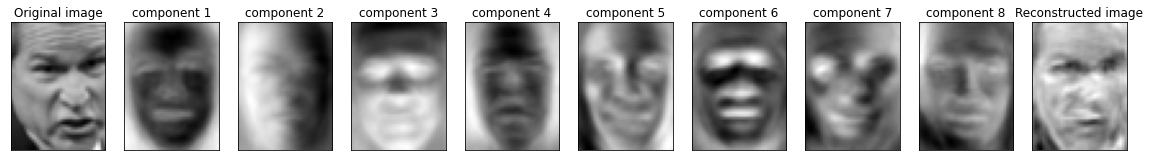

In [26]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 10, 1, xticks=[], yticks=[])
ax.imshow(X_test[0].reshape(image_shape), cmap='gray')
ax.set_title('Original image')
for i in range(8):
    ax = fig.add_subplot(1, 10, i+2, xticks=[], yticks=[])
    ax.imshow(representations_onto_eigenbasis[i, :].reshape(image_shape), cmap='gray')
    ax.set_title(f"component {i+1}")
ax = fig.add_subplot(1, 10, 10, xticks=[], yticks=[])
ax.imshow(sample_reconstructed.reshape(image_shape), cmap='gray')
ax.set_title('Reconstructed image')

plt.show()

In [27]:
sample_decomposed = pca.reduce_dimensionality(X_test)[100]
sample_decomposed.shape

(150,)

In [28]:
representations_onto_eigenbasis, sample_reconstructed = pca.reconstruct_original_sample(sample_decomposed)

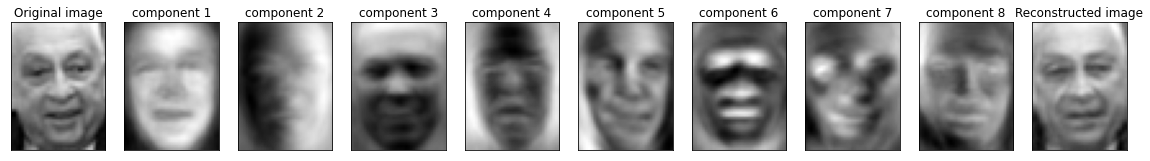

In [29]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 10, 1, xticks=[], yticks=[])
ax.imshow(X_test[100].reshape(image_shape), cmap='gray')
ax.set_title('Original image')
for i in range(8):
    ax = fig.add_subplot(1, 10, i+2, xticks=[], yticks=[])
    ax.imshow(representations_onto_eigenbasis[i, :].reshape(image_shape), cmap='gray')
    ax.set_title(f"component {i+1}")
ax = fig.add_subplot(1, 10, 10, xticks=[], yticks=[])
ax.imshow(sample_reconstructed.reshape(image_shape), cmap='gray')
ax.set_title('Reconstructed image')

plt.show()

Describe your analysis here.</br>

Analyze and contrast the differences between the original and reconstructed face images.</br> Also describe the differences between results for the two examples</br>

- original image는 1850개의 feature를 사용하여 나타낸 것이고 reconstructed face image는 feature extractor를 통해 150개의 principal component로 나타낸 것이다.

- principal component는 전체 데이터에 대한 분석 결과로 eigenvalue가 높은 component는 전체 데이터의 공통적인 성분이 가장 많고 그 뒤로 갈수록 사람 마다의 차이를 가르는 component가 나타난다. 따라서 150개로는 원본 이미지의 세세한 부분(주름, 얼굴의 구분선 등)까지 나타내지 못하는 것을 확인할 수 있다

- 또한 각 이미지마다 component1, ... , component8이 다르게 나타나는 것을 볼 수 있다. PCA의 reduce_dimensionality함수로 구해진 (862, 150)의 데이터는 component가 데이터를 표현할 때 얼만큼의 비중을 차지하는 지를 보여주는 수치이다. 이를 coefficient라 하면, coefficient에 각 component가 곱해진 것이 위 plot에 나타난 것이다.

---

### P2.1

In [30]:
face_recognizer = FaceRecognizer(num_components=150, X=X_train, y=y_train)
face_recognizer.generate_database()

In [31]:
print(X_test.shape)
print(face_recognizer.database.shape)

(426, 1850)
(862, 150)


In [32]:
pred, distances, db_indices = face_recognizer.find_nearest_neighbor(X_test)

In [33]:
print(f"accuracy: {np.average(pred == y_test):0.4f}")

accuracy: 0.6080


In [34]:
pred.shape

(426,)

In [35]:
distances.shape

(426, 1)

In [36]:
db_indices.shape

(426,)

### P2.2

In [37]:
def plot_recognition_result(recognizer, X, y, num_queries=5, names=faces.target_names, image_shape=image_shape):
    indices = np.random.randint(low=X['test'].shape[0], size=num_queries)
    print(f"Sampled indices :{indices}")
    
    pred, distances, db_indices = face_recognizer.find_nearest_neighbor(X_test[indices, :])
    
    for i in range(num_queries):
        fig = plt.figure(figsize=(6, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(X['test'][indices[i], :].reshape(image_shape), cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.xlabel(f"Name: {names[y['test'][indices[i]]]} \n Prediction: {names[pred[i]]}")
        plt.title('Query')

        plt.subplot(1, 2, 2)
        plt.imshow(X['train'][db_indices[i], :].reshape(image_shape), cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.xlabel(f"Name: {names[y['train'][db_indices[i]]]} \n Distance: {distances[i].item():0.2f}")
        plt.title('Prediction')
        
        plt.show()


Sampled indices :[410 174  33  68 381]


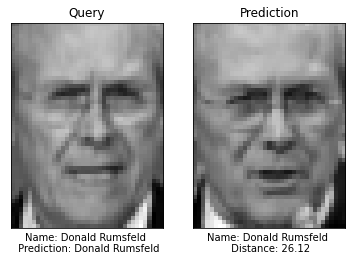

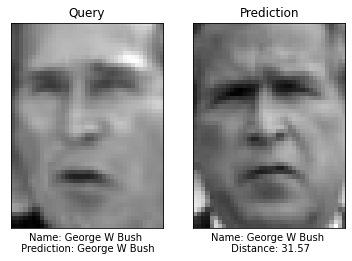

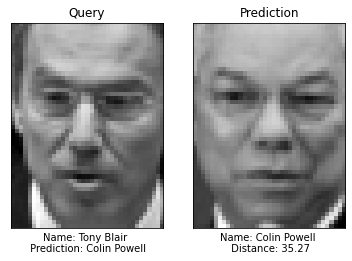

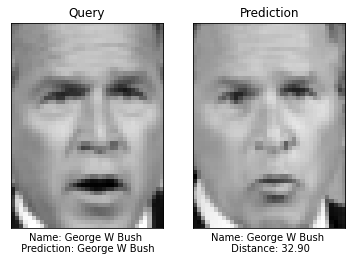

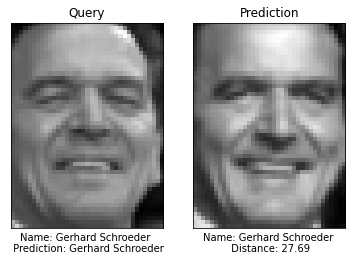

In [38]:
np.random.seed(555)
X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}
plot_recognition_result(face_recognizer, X, y)

Describe your analysis here
 - PCA과정에서 구한 eigenvector로의 projection에서 test data와 train dataset의 L2 norm(distance)을 구하여 가장작은 data를 prediction으로 한다. feature를 1850개에서 150개로 줄였을 때와 project6의 knn에서 구해진 test accuracy와 비슷한 결과가 도출되는 것을 알 수 있다.

---

## Discussion (20 points)

Your answer must include

- The curse of dimensionality.
- Feature selection vs. feature extraction.
- Explanation of PCA.
- How the PCA can deal with noisy informations (e.g., face images with sunglasses and/or medical mask,...). => 선글라스나 마스크를 낀 이미지(노이즈이미지)를 PCA를 통해 어떻게 다룰지 고민해서 상세하게 적어보자.
- Analysis on the limitations of PCA.
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

Describe your discussion here

- The curse of dimensionality는 차원의 저주로, overlap되는 classes를 분리하기 separable하게 분리하기 위해 feature를 추가함에(dimensionality가 증가함)에 따라 필요한 데이터의 수가 증가하거나 plot시 매우 sparse(empty)하게 되는 문제이다. 따라서, 차원을 늘리게 되면 어느순간 performance가 감소하게된다.

- curse of dimensionality를 해결하기 위해 사전지식으로써 data sample이 들어있지 않은 공간을 알고 있거나, Regulariztation을 하거나 dimensionality를 줄이는 방법이 있다.

- 이때 dimensionality를 줄이는 방법으로 Feature selection과 Feature extraction이 있다. feature selection은 많은 feature중 목적에 부합하는 변수를 선택하는 방법으로 선택한 변수에 대해 해석을 용이하게 할 수 있다. feature extraction은 변수간의 상관관계를 고려한 예측변수의 변환하는 방법으로, 초기 데이터의 information과 structure (originality)를 잘 보존할 수 있다.

- unsupervised, feature extractor로 PCA(Principal components analysis)방법이 존재한다. originality를 최대한 유지하는(variance를 최대한 유지하는) 기존 dimension의 subspace를 찾는 것이다. 기존 데이터를 하나의 subspace에 projection 시켰을 때 variance가 가장 큰 순서대로 principal component가 된다. 같은말로, 데이터의 covarinace의 eigenvalue가 큰 순서대로, 그 eigenvalue와 pair를 이루는 eigenvector로 principal component를 구할 수 있다. feature 수와 동일한 eigenvector를 구할 수 있으며, 큰 eigenvalue의 pair인 eigenvector는 모든 데이터의 공통적인 특징을 잘 표현하고 작아질수록 각 데이터를 구분하는 세부적인 특징이 드러난다.   

- 노이즈된 이미지들에 대해 다루는 방법으로는, 먼저 noise를 고려하지 않은 이미지들에 대해서 dataset을 구성한 후 PCA를 통해 eigenface를 추출하고, 이후 test dataset(x)을 eigenface로 근사한 이미지들(y)에 대해 |x-y|가 큰 값인 부분(노이즈가 있는 부분)을 평균 얼굴 이미지로 대체함으로써 나타낼 수 있을 것이다.  

- 데이터의 class label(범주)에 대한 정보를 고려하지 않기 때문에 PCA를 통해 class의 separability를 확인하기는 어렵다. 또한 PCA는 데이터의 분포가 가우시안이 아니거나 다중 가우시안인 자료들에 대해서는 적용이 어렵다. 

PCA

- PCA의 find_principal_components함수에서는 데이터를 standardization하여 그 데이터의 covariance, eigenvector, eigenvalue를 구한다. 이때 num_components변수만큼 eigenvalue가 큰 순서대로 eigenvalue와 pair인 eigenvector를 뽑는다.
- reduce_dimensionality함수에서는 find_principal_components함수에서 구한 eigenvector에 데이터를 projection하여 principal component를 구한다.
- reconstruct_original_sample에서는 principal component와 eigenvector를 곱하여 더함으로써 원본이미지에서 feature를 reduction하여 reconstructure를 통해 구한 이미지를 뽑아낼 수 있다.



FaceRecognizer

- FaceRecognizer의 generate_database는 데이터를 eigenvector에 projection 시킨
주성분을 구하는 함수이다. 
- find_nearest_neighbor는 마찬가지로 들어오는 sample에 대해 projection을 한 후 
database에 있는 데이터들에 대해 nearest neighbor를 L2 norm의 방식으로 구한다.

---